In [100]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime

In [24]:
ini = 56
fim = 62
dir = "../video/F5/F5/141227XX.F34/Cyclic/141227XX.F34/ACDAT0"
for i in range(ini,fim):
    path = dir + str(i) + ".xml"
    df = pd.read_xml(path, xpath="//AC")
    df1 = pd.read_xml(path)
    df["UTC"] = df1["UTC"]
    path1 = 'csv/F5_' + str(i) + '.csv'
    df.to_csv(path1, index= False)
    
    

In [ ]:
#54803000 inicio do video #idx = 234
#55052000 fim do video    #idx = 2723

In [93]:
df = pd.read_csv('csv/F5_56.csv')

for i in range(57,62):
    path = 'csv/F5_' + str(i) + '.csv'
    df1 = pd.read_csv(path)
    df = pd.concat([df, df1], ignore_index=True)

In [56]:
path1 = 'csv/F5_56_to_61.csv'
df.to_csv(path1, index= False)

In [60]:
df = pd.read_csv('csv/F5_56_to_61.csv')

In [11]:
df[df["UTC"]>54810000].index

Int64Index([  40,   41,   42,   43,   44,   45,   46,   47,   48,   49,
            ...
            2460, 2461, 2462, 2463, 2464, 2465, 2466, 2467, 2468, 2469],
           dtype='int64', length=2430)

In [4]:
df[df["UTC"]<55053000].index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2724, 2725, 2726, 2727, 2728, 2729, 2730, 2731, 2732, 2733],
           dtype='int64', length=2734)

In [61]:
df1 = df[310:2800]


In [49]:
df1

,Nor_Vel,East_Vel,Down_Vel,LAT,Long,Nx_Accel,Ny_Accel,Nz_Accel,Nor_Accel,Mag_Head,...,SYS_Alt,BARO_Alt,RALT_Alt,Wind_Mag,Wind_Dir,MS_Mode,AC_Mode,FOM,Fuel,UTC
310,-282,622,-14,-0.172437,-0.281149,0.400050,1.209675,18.849976,1.916476,126,...,27860,27678,NaN,144,318,2,12,1,3488,54810676
311,-282,622,-15,-0.172438,-0.281147,0.485775,1.019175,18.745201,1.902553,126,...,27868,27685,NaN,144,318,2,12,1,3487,54810768
312,-282,622,-17,-0.172439,-0.281145,0.466725,1.285875,18.811874,1.912836,126,...,27876,27698,NaN,144,318,2,12,1,3487,54810876
313,-282,621,-17,-0.172440,-0.281143,0.523875,1.257300,18.964275,1.927152,126,...,27884,27700,NaN,144,318,2,12,1,3487,54810968
314,-282,621,-19,-0.172440,-0.281142,0.476250,1.419225,19.116674,1.944108,126,...,27896,27713,NaN,144,318,2,12,1,3488,54811076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,-461,0,-56,-0.171631,-0.279350,2.171700,9.239250,-1.390650,0.975473,211,...,23408,23255,NaN,104,327,0,1,1,3243,55059168
2796,-460,-2,-54,-0.171632,-0.279350,2.162175,8.991600,-1.400175,0.951054,211,...,23408,23258,NaN,104,327,0,1,1,3243,55059276
2797,-460,-4,-53,-0.171633,-0.279350,2.266950,9.182100,-1.571625,0.975013,212,...,23408,23258,NaN,104,327,0,1,1,3243,55059368
2798,-459,-6,-51,-0.171634,-0.279350,2.390775,9.420225,-1.571625,1.000849,212,...,23412,23263,NaN,104,327,0,1,1,3243,55059476


In [62]:
path1 = 'csv/F5_56_to_61_filtered.csv'
df1.to_csv(path1, index= False)

In [98]:


def drop_outliers(df, column):
    angles = df[column].tolist()
    df1 = pd.DataFrame()
    limit = 1
    for i in range(1,len(angles)):
        if angles[i]!= None and angles[i-1]!= None:
            if abs(abs(angles[i]) - abs(angles[i-1])) > limit:
                angles[i] = None
                #print(i)
    
    df1[column] = angles
    return df1

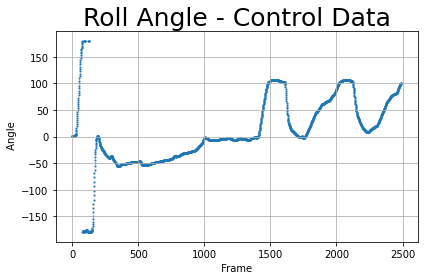

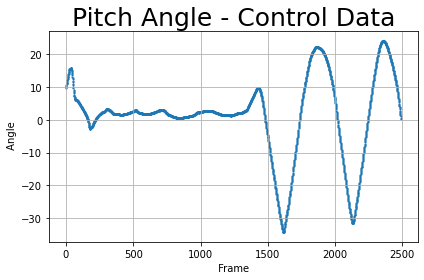

In [103]:
df = pd.read_csv('csv/F5_56_to_61_filtered.csv')
col = ["Roll", "Pitch"]
for column in col:
  
  fig, ax = plt.subplots()

  x = df.index.tolist()
  y = df[column].values.tolist()
  ax.scatter(x,y, marker=".", s =5)
  plt.grid ()
  title = column +" Angle - Control Data"
  plt.title(title,fontsize=25)
  plt.xlabel ( ' Frame ')
  plt.ylabel ( ' Angle')
  plt.tight_layout ()
  
  plt.show()

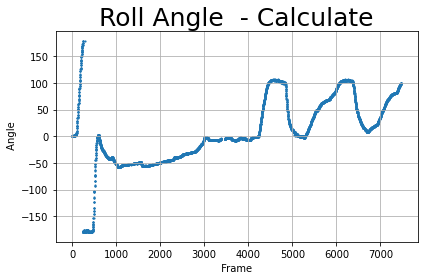

In [102]:
df1 = pd.read_csv('csv/F5_roll_angle_form.csv')
df = df1.copy()
for column in df:
  inst = str(column)
  
  fig, ax = plt.subplots()

  x = df.index.tolist()
  y = df[column].values.tolist()
  ax.scatter(x,y, marker=".", s =5)
  plt.grid ()
  plt.title("Roll Angle  - Calculate",fontsize=25)
  plt.xlabel ( ' Frame ')
  plt.ylabel ( ' Angle')
  plt.tight_layout ()
  plt.show()

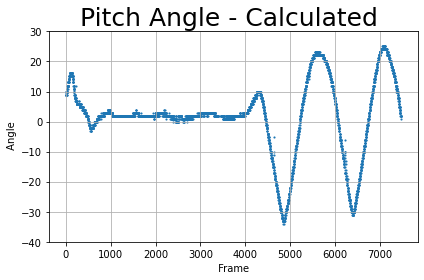

In [99]:
df1 = pd.read_csv('csv/F5/pitch_angle_1017_2312.csv')
df = drop_outliers(df1, "pitch_angle")
for column in df:
  inst = str(column)
  
  fig, ax = plt.subplots()

  x = df.index.tolist()
  y = df[column].values.tolist()
  ax.scatter(x,y, marker=".", s =5)
  plt.grid ()
  plt.title("Pitch Angle - Calculated ",fontsize=25)
  plt.xlabel ( ' Frame ')
  plt.ylabel ( ' Angle')
  plt.tight_layout ()
  plt.ylim(-40,30)
  plt.show()

In [101]:
path = 'csv/F5/pitch_angle_' + datetime.today().strftime('%m%d_%H%M') + '.csv'
df.to_csv(path, index= False)
df.describe()

,pitch_angle
count,7072.000000
mean,2.053167
std,11.872847
min,-34.000000
25%,1.000000
50%,2.000000
75%,7.000000
max,25.000000


In [78]:
#Ajustando o arquivo Roll_Angle

df1 = pd.read_csv('csv/F5/roll_angle_1017_1055.csv')
df2 = pd.read_csv('csv/F5/estados_1017_2312.csv')
df = pd.DataFrame()
angles = []
for i in range(len(df1)):
    state = df2["estado"][i]
    angle = df1["roll_angle"][i]
    if angle!=None:
        if state == 2:
            angle = angle + 180
        elif state == 3:
            angle = angle - 180

    angles.append(angle)

df["roll_angle"] = angles

path1 = 'csv/F5_roll_angle_form.csv'
df.to_csv(path1, index= False)        